In [1]:
# Note: 'keras<3.x' or 'tf_keras' must be installed (legacy)
# See https://github.com/keras-team/tf-keras for more details.
from huggingface_hub import from_pretrained_keras

model = from_pretrained_keras("keras-io/MPNN-for-molecular-property-prediction")
model

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

In [2]:
import keras
import pandas as pd
import os, sys

# Zakładam, że folder 'scripts' jest na tym samym poziomie co 'notebooks'
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from graph_utils import *

In [3]:
csv_path = keras.utils.get_file(
    "BBBP.csv", "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv"
)

df = pd.read_csv(csv_path, usecols=[1, 2, 3])
df.iloc[96:104]

,name,p_np,smiles
96,cefoxitin,1,CO[C@]1(NC(=O)Cc2sccc2)[C@H]3SCC(=C(N3C1=O)C(O...
97,Org34167,1,NC(CC=C)c1ccccc1c2noc3c2cccc3
98,9-OH Risperidone,1,OC1C(N2CCC1)=NC(C)=C(CCN3CCC(CC3)c4c5ccc(F)cc5...
99,acetaminophen,1,CC(=O)Nc1ccc(O)cc1
100,acetylsalicylate,0,CC(=O)Oc1ccccc1C(O)=O
101,allopurinol,0,O=C1N=CN=C2NNC=C12
102,Alprostadil,0,CCCCC[C@H](O)/C=C/[C@H]1[C@H](O)CC(=O)[C@@H]1C...
103,aminophylline,0,CN1C(=O)N(C)c2nc[nH]c2C1=O.CN3C(=O)N(C)c4nc[nH...


In [4]:
# Shuffle array of indices ranging from 0 to 2049
permuted_indices = np.random.permutation(np.arange(df.shape[0]))

# Train set: 80 % of data
train_index = permuted_indices[: int(df.shape[0] * 0.8)]
x_train = graphs_from_smiles(df.iloc[train_index].smiles)
y_train = df.iloc[train_index].p_np

# Valid set: 19 % of data
valid_index = permuted_indices[int(df.shape[0] * 0.8) : int(df.shape[0] * 0.99)]
x_valid = graphs_from_smiles(df.iloc[valid_index].smiles)
y_valid = df.iloc[valid_index].p_np

# Test set: 1 % of data
test_index = permuted_indices[int(df.shape[0] * 0.99) :]
x_test = graphs_from_smiles(df.iloc[test_index].smiles)
y_test = df.iloc[test_index].p_np

[17:54:09] Explicit valence for atom # 12 N, 4, is greater than permitted
[17:54:09] WARNING: not removing hydrogen atom without neighbors
[17:54:09] WARNING: not removing hydrogen atom without neighbors
[17:54:09] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:54:09] WARNING: not removing hydrogen atom without neighbors
[17:54:09] WARNING: not removing hydrogen atom without neighbors
[17:54:09] WARNING: not removing hydrogen atom without neighbors
[17:54:09] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:54:09] WARNING: not removing hydrogen atom without neighbors
[17:54:09] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors


Invalid SMILES string: c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br
Invalid SMILES string: n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O
Invalid SMILES string: c1(cc(N\C(=[NH]\c2cccc(c2)CC)C)ccc1)CC


[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] Explicit valence for atom # 6 N, 4, is greater than permitted
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:54:10] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] Explicit valence for atom # 11 N, 4, is greater than permitted


Invalid SMILES string: n1c(csc1\[NH]=C(\N)N)c1ccccc1
Invalid SMILES string: c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC
Invalid SMILES string: n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N
Invalid SMILES string: s1cc(nc1\[NH]=C(\N)N)C
Invalid SMILES string: s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N


[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] Explicit valence for atom # 6 N, 4, is greater than permitted
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10

Invalid SMILES string: Cc1nc(sc1)\[NH]=C(\N)N
Invalid SMILES string: n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N\C(NC)=[NH]\C#N
Invalid SMILES string: O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3


[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] WARNING: not removing hydrogen atom without neighbors
[17:54:10] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:54:10] WARNING: not removing hydrogen atom without neighbors


Name:	acetylsalicylate
SMILES:	CC(=O)Oc1ccccc1C(O)=O
BBBP:	0
Molecule:


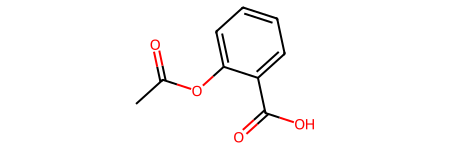

In [5]:
print(f"Name:\t{df.name[100]}\nSMILES:\t{df.smiles[100]}\nBBBP:\t{df.p_np[100]}")
molecule = molecule_from_smiles(df.iloc[100].smiles)
print("Molecule:")
molecule

In [6]:
graph = graph_from_molecule(molecule)
print("Graph (including self-loops):")
print("\tatom features\t", graph[0].shape)
print("\tbond features\t", graph[1].shape)
print("\tpair indices\t", graph[2].shape)

Graph (including self-loops):
	atom features	 (13, 29)
	bond features	 (39, 7)
	pair indices	 (39, 2)


In [7]:
atom_dim=x_train[0][0][0].shape[0]
bond_dim=x_train[1][0][0].shape[0]

In [8]:
atom_dim, bond_dim

(29, 7)

In [14]:
x_train[0][0][0].shape[0], x_train[1][0][0].shape[0]

(29, 7)

In [19]:
x_train?

Type:        tuple
String form:
([tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0 <...>  8],
           [20, 20],
           [20,  7],
           [20, 21],
           [21, 21],
           [21, 20]])])
Length:      3
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.

In [15]:
mpnn = MPNNModel(
    atom_dim=x_train[0][0][0].shape[0], bond_dim=x_train[1][0][0].shape[0],
)

# mpnn.compile(
#     #loss=keras.losses.BinaryCrossentropy(),
#     #optimizer=keras.optimizers.Adam(learning_rate=5e-4),
#    # metrics=[keras.metrics.AUC(name="AUC")],
# )

#keras.utils.plot_model(mpnn)#$, show_dtype=True, show_shapes=True)
mpnn

MPNNModel(
  (message_passing): MessagePassing(
    (message_step): EdgeNetwork()
    (update_step): GRUCell(64, 64)
  )
  (transformer_readout): TransformerEncoderReadout(
    (partition_padding): PartitionPadding()
    (attention): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
    )
    (dense_proj): Sequential(
      (0): Linear(in_features=64, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=64, bias=True)
    )
    (layernorm_1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (layernorm_2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (dense1): Linear(in_features=512, out_features=512, bias=True)
  (dense2): Linear(in_features=512, out_features=1, bias=True)
)

In [20]:
train_dataset = MPNNDataset(x_train, y_train)
valid_dataset = MPNNDataset(x_valid, y_valid)
test_dataset = MPNNDataset(x_test, y_test)

history = mpnn.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=40,
    verbose=2,
    class_weight={0: 2.0, 1: 0.5},
)

plt.figure(figsize=(10, 6))
plt.plot(history.history["AUC"], label="train AUC")
plt.plot(history.history["val_AUC"], label="valid AUC")
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("AUC", fontsize=16)
plt.legend(fontsize=16)

AttributeError: 'MPNNModel' object has no attribute 'fit'